# First Notebook - Initial Data Exploration

The intention of this notebook is to explore the dataset and gain familiarisation with the FER-2013 dataset. This will include a general look at the data contained within the FER-2013 dataset and other processes, such as visualising the data through charts.

In [1]:
# Imported Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Loading in Data

The function defined within this cell is intended to be used to load in the FER-2013 dataset in a suitable format for training a model. However, it will still be utilised here in order to load in the dataset and make visualisations based on the loaded data.

In [2]:
# Function used to load in the dataset in the correct format for
# training purposes
def load_dataset(data):
    # Split the dataset according to its usage
    # Training is used for training purposes whereas privatetest is used as 
    # validation data and publictest is used as testing data
    train_data = data.loc[data['Usage'] == 'Training']
    val_data = data.loc[data['Usage'] == 'PrivateTest']
    test_data = data.loc[data['Usage'] == 'PublicTest']

    # Processing the training features
    X_train = train_data[['pixels']].values
    X_train = [np.fromstring(i[0], dtype=int, sep=' ') for i in X_train]
    X_train = [i.reshape((48, 48, 1)).astype('float32') for i in X_train]
    X_train = np.array(X_train) / 255.0

    # Processing the validation features
    X_val = val_data[['pixels']].values
    X_val = [np.fromstring(i[0], dtype=int, sep=' ') for i in X_val]
    X_val = [i.reshape((48, 48, 1)).astype('float32') for i in X_val]
    X_val = np.array(X_val) / 255.0

    # Processing the testing features
    X_test = test_data[['pixels']].values
    X_test = [np.fromstring(i[0], dtype=int, sep=' ') for i in X_test]
    X_test = [i.reshape((48, 48, 1)).astype('float32') for i in X_test]
    X_test = np.array(X_test) / 255.0

    # Processing training labels 
    y_train = train_data[['emotion']].values
    y_train = tf.keras.utils.to_categorical(y_train)

    # Processing validation labels 
    y_val = val_data[['emotion']].values
    y_val = tf.keras.utils.to_categorical(y_val)

    # Processing testing labels
    y_test = test_data[['emotion']].values
    y_test = tf.keras.utils.to_categorical(y_test)

    # Returning the different datassets for train, test, and val as tuples
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

## Exploring the Pandas Dataframe

In [3]:
# Loading in the dataset from the .csv FER-2013 file
df = pd.read_csv('datasets\\fer2013.csv')

In [4]:
# Display first five elements of the dataset (contained within the dataframe)
df.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
# Total number of entries in the dataset (train/val/test)
print(df.shape)

(35887, 3)


In [6]:
# Number of rows present within the database
df.count()

emotion    35887
pixels     35887
Usage      35887
dtype: int64

## Visualisations of the Dataset

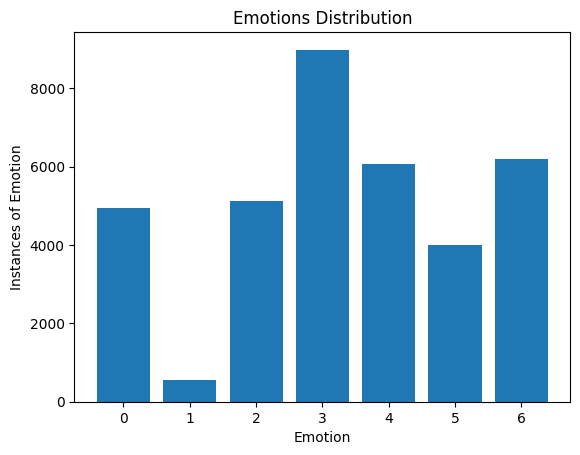

In [7]:
# Plotting the distributions of the dataset, i.e. the instances of emotion value
# per the target label
def plotDataset():
    plt.style.use('default')
    emotion_counts = df['emotion'].value_counts()
    plt.bar(emotion_counts.index, emotion_counts.values)
    
    plt.title('Emotions Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Instances of Emotion')
    plt.show()
    
plotDataset()

In [8]:
# Loading in datset in order to view images
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_dataset(df)

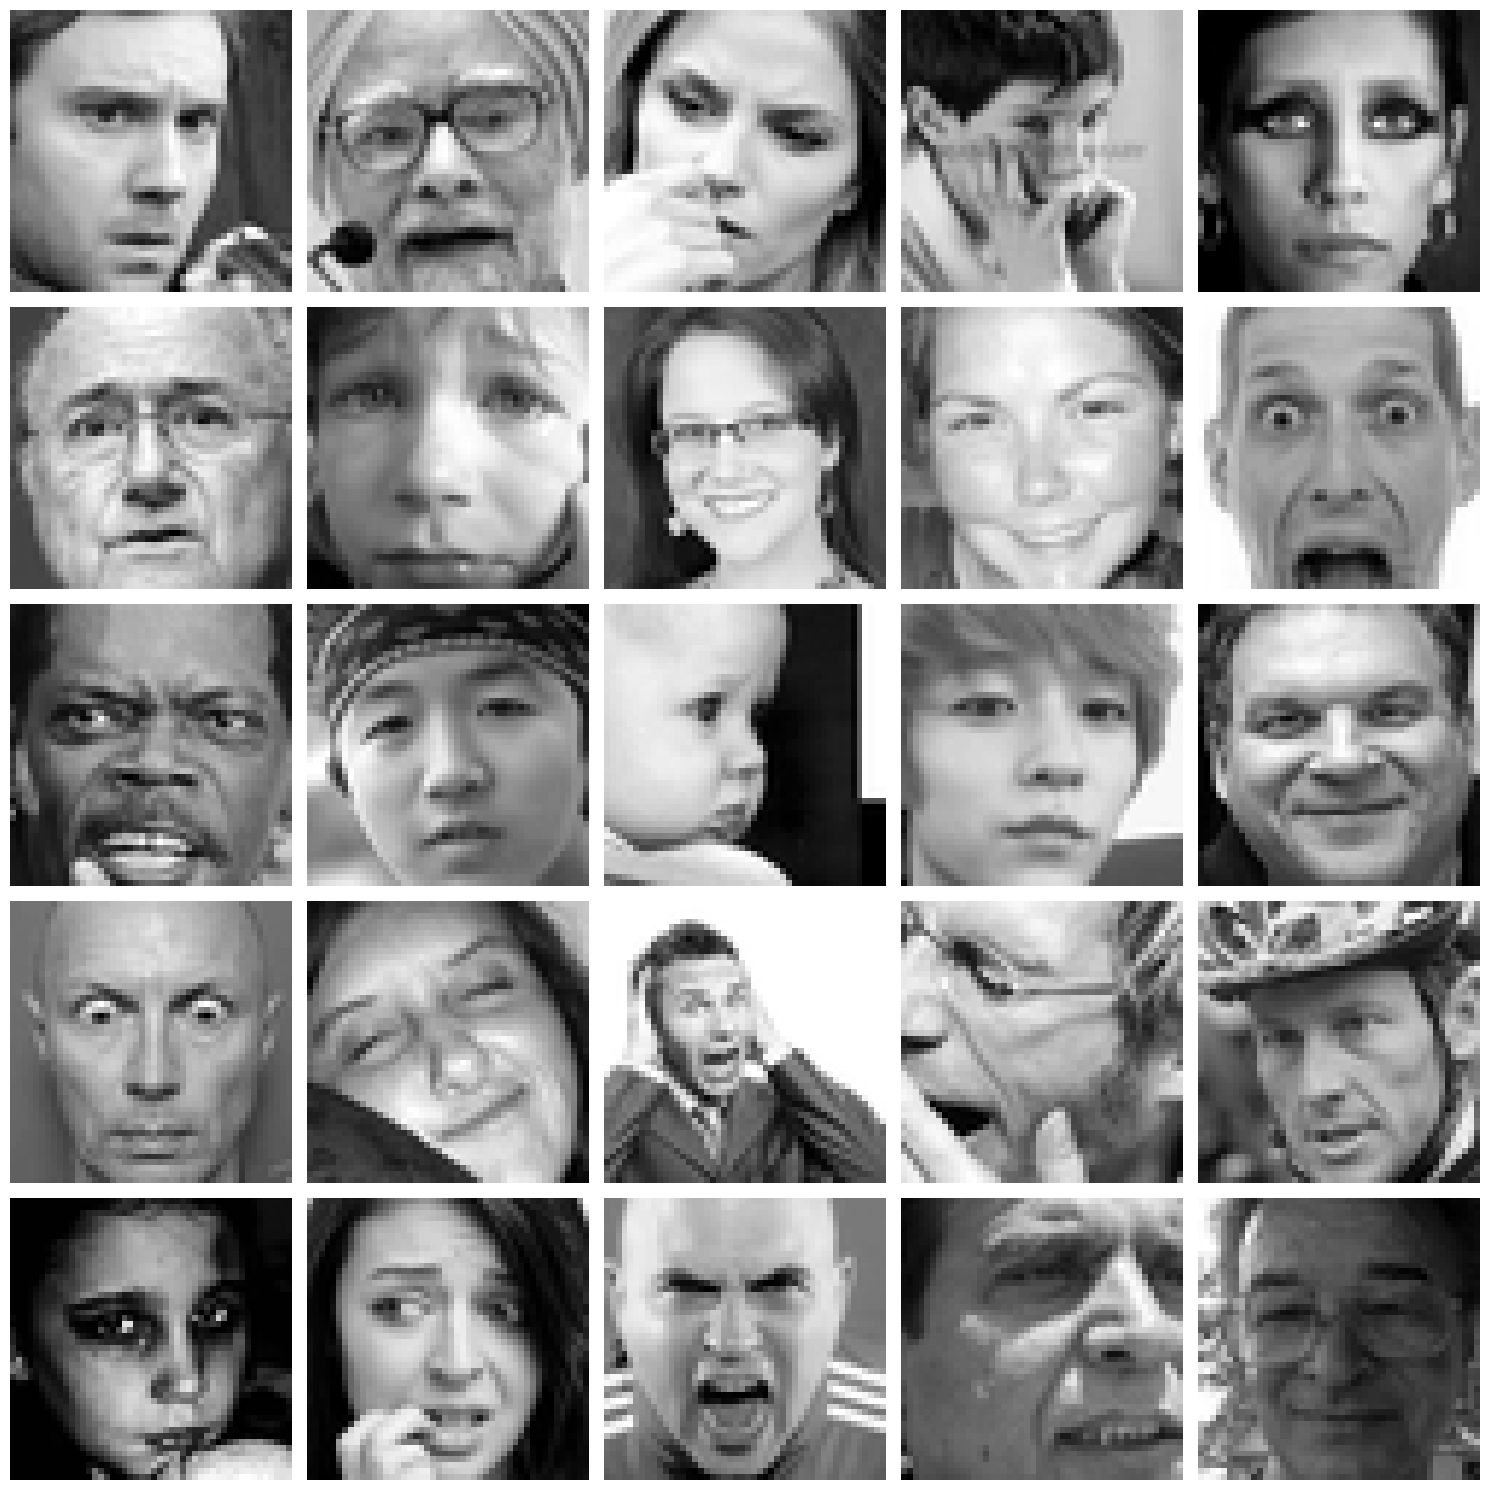

In [16]:
# Plotting sample images from the training data
def plotImages():
    plt.style.use('ggplot')

    plt.figure(figsize=(15, 15))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(X_train[i].reshape((48, 48)), cmap="gray")
        plt.axis('off')
        plt.tight_layout()
plotImages()